In [23]:
import healpy as hp
import numpy as np

In [24]:
cd /global/project/projectdirs/planck/software/zonca/software/foregrounds2018_conference/out/fg2018_61pix_1y/out_000

/global/project/projectdirs/planck/software/zonca/software/foregrounds2018_conference/out/fg2018_61pix_1y/out_000


In [25]:
ls -lah

total 373M
drwxrwx--- 2 zonca zonca  512 Oct  4 21:18 ./
drwxrwx--- 3 zonca zonca  512 Oct  4 21:36 ../
-rw-rw---- 1 zonca zonca  37M Oct  4 21:18 madam_bmap.fits
-rw-rw---- 1 zonca zonca  13M Oct  4 21:18 madam_hmap.fits
-rw-rw---- 1 zonca zonca  37M Oct  4 21:18 madam_map.fits
-rw-rw---- 1 zonca zonca 145M Oct  4 21:18 madam_wcov.fits
-rw-rw---- 1 zonca zonca 145M Oct  4 21:18 madam_wcov_inv.fits


In [26]:
m = hp.read_map("madam_map.fits", (0,1,2))

NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
Ordering converted to RING
Ordering converted to RING


In [27]:
%matplotlib inline

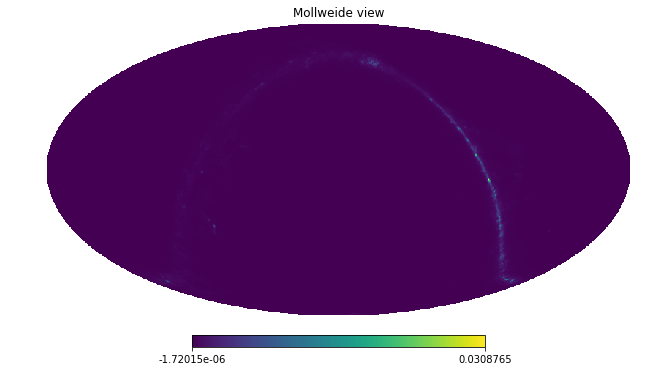

In [28]:
hp.mollview(m[0])

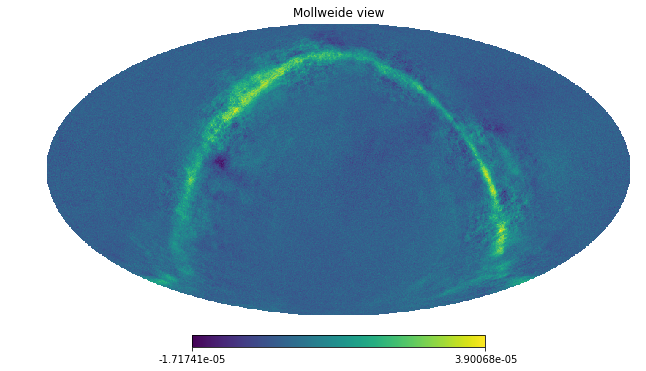

In [29]:
hp.mollview(m[1])

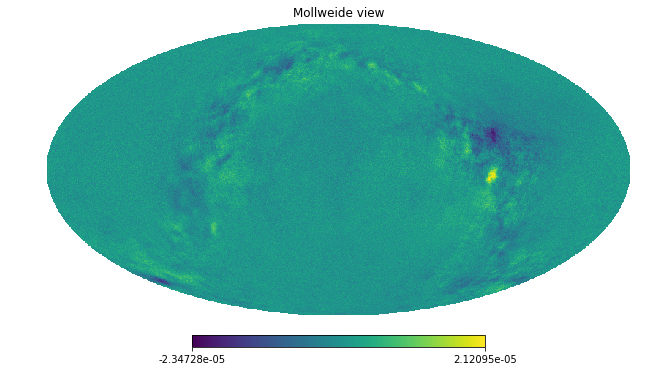

In [30]:
hp.mollview(m[2])

In [31]:
h=hp.read_map("madam_hmap.fits")

NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


In [32]:
h.sum()/122/3600/24/365

40.0

In [33]:
import pysm

In [34]:
cat /global/homes/z/zonca/foregrounds2018_conference/scanning.par

--samplerate
80.0
--spinperiod
1.0
--spinangle
65.0
--precperiod
600.0
--precangle
30.0
--hwprpm
0.0
--baseline
60.0
--nside
512
--obs
24.0
--input_pysm_model
d7,f1,s3
--apply_beam
--flush


In [35]:
import pysm
from pysm.nominal import models


nside = 512
sky_config = {
    'synchrotron' : models("s3", nside),
    'dust' : models("d7", nside),
    'freefree' : models("f1", nside),
}

In [36]:
sky = pysm.Sky(sky_config)


In [37]:
total = sky.signal()(89.6)


In [38]:
input_sky = hp.ma(total)

In [39]:
ecl2gal = hp.Rotator(coord="EG")

In [40]:
m_gal = hp.ma(ecl2gal.rotate_map_alms(m))

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


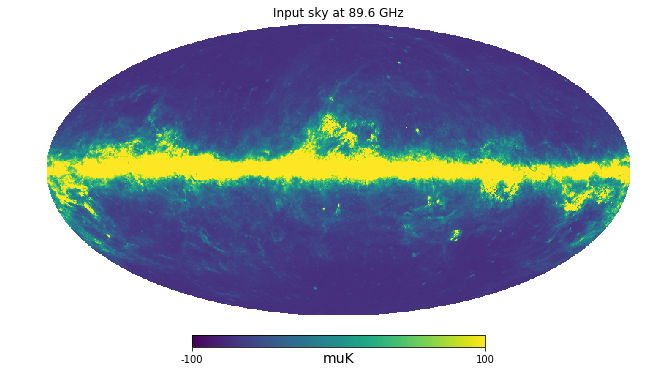

In [41]:
hp.mollview(input_sky[0]-input_sky[0].mean(), min=-1e2,max=1e2, title="Input sky at 89.6 GHz", unit="muK")

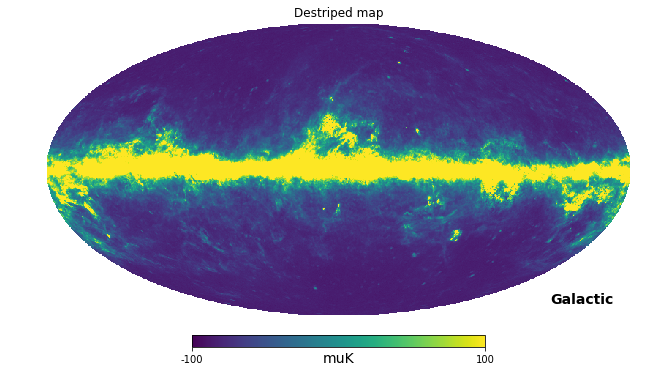

In [42]:
hp.mollview(m[0]*1e6-(m[0]*1e6).mean(), coord="EG", min=-1e2,max=1e2, title="Destriped map", unit="muK")

In [43]:
import seaborn as sns

Sigma is 4.034279 arcmin (0.001174 rad) 
-> fwhm is 9.500000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


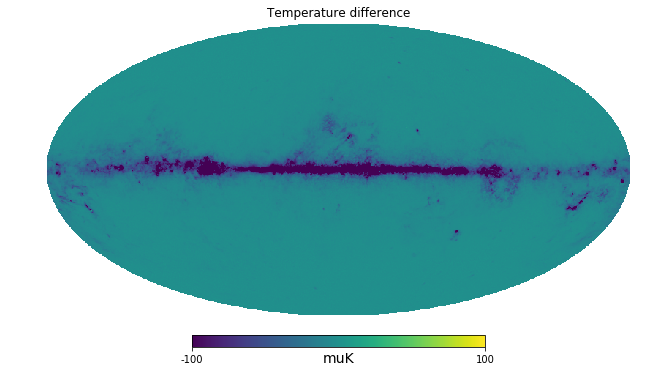

In [44]:
d=-m_gal[0]*1e6+ hp.smoothing(input_sky[0], fwhm=np.radians(9.5/60))
hp.mollview(d, min=-100, max=100, unit="muK", title="Temperature difference")

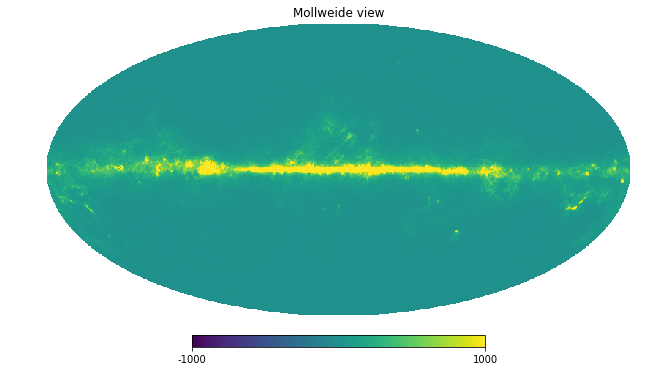

In [45]:
hp.mollview(m_gal[0]*1e6, min=-1000,max=1e3)

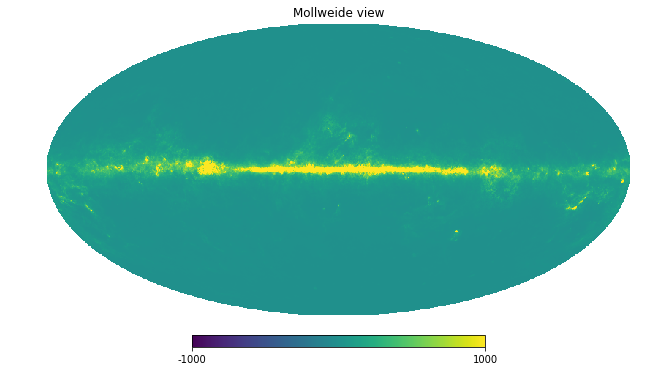

In [46]:
hp.mollview(input_sky[0], min=-1000,max=1e3)

In [47]:
import numpy as np

In [48]:
p_m = np.sqrt((m_gal[1]*1e6)**2 + (m_gal[2]*1e6)**2)

In [49]:
input_p = np.sqrt(input_sky[1]**2 + input_sky[2]**2)

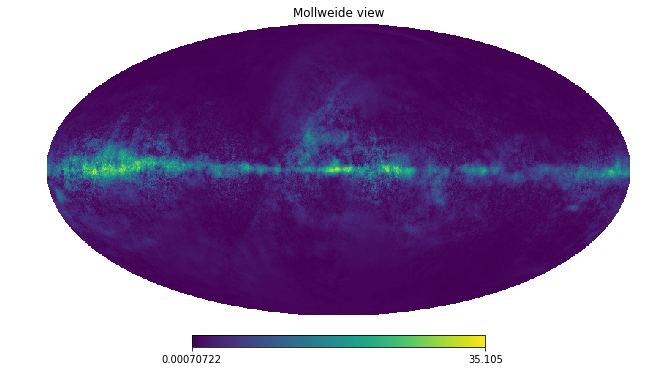

In [50]:
hp.mollview(input_p)

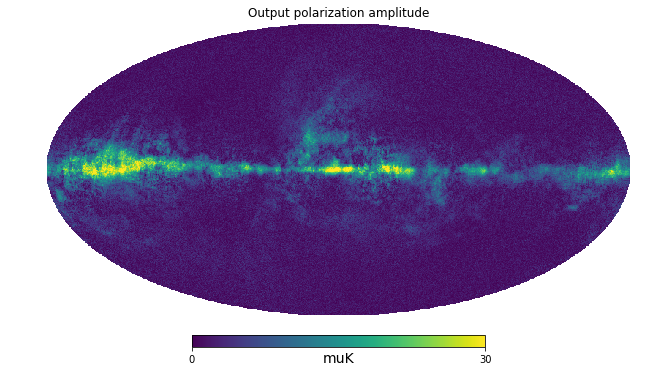

In [51]:
hp.mollview(p_m, min=0, max=30, unit="muK", title="Output polarization amplitude")

In [67]:
input_p_sm = hp.smoothing(input_p,fwhm=np.radians(9.5/60))

Sigma is 4.034279 arcmin (0.001174 rad) 
-> fwhm is 9.500000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [68]:
np.median(hp.ma(p_m) / hp.ma(input_p_sm))

/global/homes/z/zonca/condajupynersc/lib/python3.6/site-packages/numpy/core/fromnumeric.py:664: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


1.592730454774041

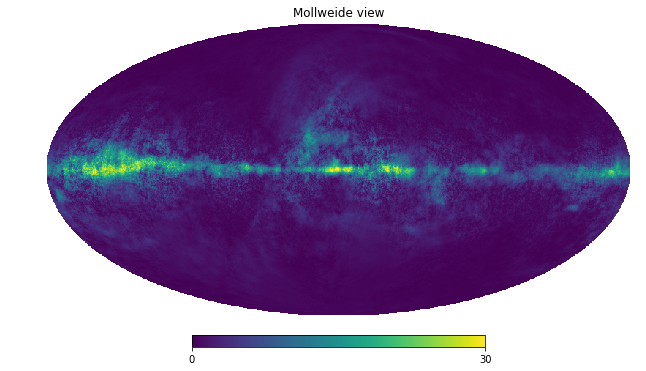

In [69]:
hp.mollview(input_p_sm,min=0, max=30)

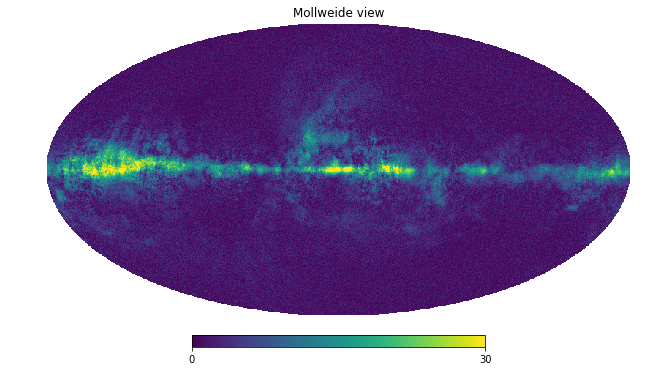

In [62]:
hp.mollview(p_m, min=0, max=30)

In [70]:
diff_scaled = input_p_sm * 1.6 - p_m

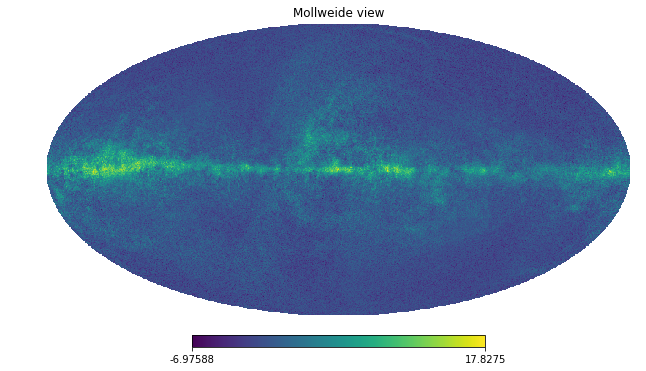

In [71]:
hp.mollview(diff_scaled - diff_scaled.mean())

In [79]:
diff = input_p_sm * m - p_m

Sigma is 127.398270 arcmin (0.037059 rad) 
-> fwhm is 300.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


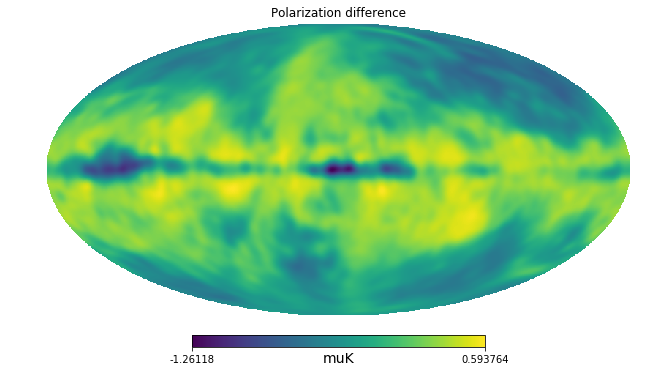

In [81]:
hp.mollview(hp.smoothing(diff - diff.mean(), fwhm=np.radians(5)), unit="muK", title="Polarization difference")

In [75]:
A = np.vstack([input_p_sm, np.ones(len(input_p_sm))]).T

In [76]:
m, c = np.linalg.lstsq(A, p_m, rcond=None)[0]


In [77]:
m 

1.0518834104499422

In [78]:
c

0.8293518419896676